# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [61]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [62]:
def f(x):
    return x**2 * numpy.sin(x)

Ensure your function works with numpy arrays:

In [63]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [64]:
def g(x):
    y=0
    c=(2 * y * numpy.sin(y) - ( y**2 - 2) * numpy.cos(y))
    an_int = (2 * x * numpy.sin(x) - ( x**2 - 2) * numpy.cos(x)) - c
    return an_int

Check your solution with the same numpy array:

In [65]:
assert g(0) == 0.

In [66]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [67]:
def integrate_analytic(xmin, xmax):
    def def_int(x):
        return (2 * x * numpy.sin(x) - ( x**2 - 2) * numpy.cos(x))
    return def_int(xmax)-def_int(xmin)

Check your analytic function:

In [68]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [77]:
def integrate_numeric(xmin, xmax, N):
    dx=(xmax-xmin)/N 
    h=dx/2
    s = f(xmax) + f(xmin)
    for i in range(1, 2*N, 2):
        s += 4 * f(xmin + i * h)
    for i in range(2, (2*N)-1, 2):
        s += 2 * f(xmin + i * h)
    return s * h / 3

Make sure you have implemented Simpson's rule correctly:

In [78]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [79]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


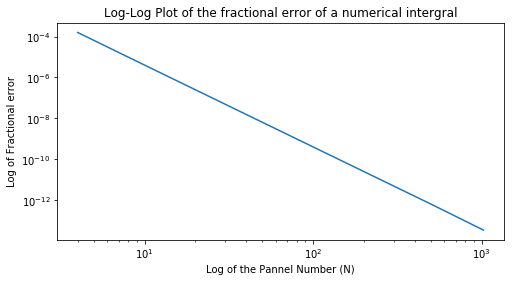

In [97]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = numpy.array([4, 8, 16, 32, 64, 128, 256, 512, 1024])  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

result_numeric_err = []

for panel_num in panel_counts:
    result_numeric_err.append(numpy.abs(integrate_numeric(x0, x1, panel_num)-result_analytic)/result_analytic)

plt.figure(figsize=(8, 4))
plt.xlabel("Log of the Pannel Number (N)")
plt.ylabel("Log of Fractional error")
plt.title("Log-Log Plot of the fractional error of a numerical intergral")
plt.loglog(panel_counts, result_numeric_err)

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

When the nuber of pannels is increased, the error in the result of the numerical method gets smaller. When the nuber of pannels is taken too large, the error becomes dominated by numerical round-off issues and hence varies and slightly increases.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

When the number of pannels is increased, the error in the result of the numerical method gets smaller. However, compared with simpson rule, the rate at which the error decreases is much less.